# Spoint tutorial: Deconvolution of cell types composition on human brain Visium dataset

July 2023

Dataset: Visium slices of human dorsolateral prefrontal cortex ([here](https://zenodo.org/record/8167488)).

In [14]:
from KanCell.setting import set_environ_seed
set_environ_seed()
from KanCell import Spoint
import scanpy as sc
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=50,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3

Setting environment seed: 42


Global seed set to 0


## Load spatial transcriptomics data

The input data are anndata objects stored raw counts for scRNA-seq and ST. The scRNA-seq anndata must have cell type annotation in `.obs`.

In [15]:
sc_ad = sc.read_h5ad('/data/KanCell-main/docs/data/mouse cerebellum/sc_adata.h5ad')
st_ad = sc.read_h5ad('/data/KanCell-main/docs/data/mouse cerebellum/spatial.h5ad')

sc.pp.filter_genes(st_ad,min_cells=1)
sc.pp.filter_genes(sc_ad,min_cells=1)
sc.pp.filter_cells(st_ad,min_genes=1)
sc.pp.filter_cells(sc_ad,min_genes=1)

In [16]:
sc_ad

AnnData object with n_obs × n_vars = 23372 × 18936
    obs: 'CellType', 'n_genes'
    var: 'n_cells'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [17]:
# import scanpy as sc

# # 读取数据
# scadata = sc.read_h5ad('/data/Celloc-main/data/Hippocampus/5/25/sc_adata.h5ad')

# # 数据预处理
# sc.pp.filter_cells(scadata, min_genes=1000)  # 增加最低基因数标准
# sc.pp.filter_genes(scadata, min_cells=20)  # 增加最低细胞数标准
# sc.pp.normalize_total(scadata, target_sum=1e4)
# sc.pp.log1p(scadata)
# sc.pp.highly_variable_genes(scadata, min_mean=0.0125, max_mean=3, min_disp=0.5)  # 筛选高变基因
# scadata = scadata[:, scadata.var.highly_variable]  # 只保留高变基因

# # PCA降维
# sc.tl.pca(scadata, svd_solver='arpack')

# # 使用UMAP进行可视化
# sc.pp.neighbors(scadata, n_neighbors=30, n_pcs=20)  # 调整邻居数量和PCA成分数量
# sc.tl.umap(scadata)
# sc.pl.umap(scadata, color=['CellType'])

# # 聚类分析
# sc.tl.louvain(scadata, resolution=1.0)
# sc.pl.umap(scadata, color=['louvain', 'CellType'])

# # 去除噪音簇
# cluster_sizes = scadata.obs['louvain'].value_counts()
# noise_clusters = cluster_sizes[cluster_sizes < 200].index  # 假设小于20的簇为噪音簇
# scadata_filtered = scadata[~scadata.obs['louvain'].isin(noise_clusters), :]

# # 再次绘制UMAP
# sc.tl.umap(scadata_filtered)
# sc.pl.umap(scadata_filtered, color=['CellType'])


In [18]:
# import scanpy as sc
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.pyplot as plt
# sc.pp.neighbors(sc_ad, n_pcs=50)
# sc.tl.umap(sc_ad)


## Initialize the Spoint model

In this step, we initialize the Spoint model using anndata objects for scRNA-seq and ST as input. The `celltype_key` parameter represents the column name of the cell type annotation in the `.obs` attribute of the scRNA-seq anndata object. The `sm_size` parameter controls the number of simulated spots, and it is important to have a sufficient `sm_size` for accurate prediction. However, it should be noted that increasing the `sm_size` will also increase the simulation and training time. In general, we recommend setting `sm_size` to a value greater than 100,000.

In [19]:
import os,sys

spoint_model = Spoint.init_model(sc_ad,st_ad,celltype_key='CellType',deg_method='t-test',sm_size=100000,use_gpu=True)

Setting global seed: 42


normalizing counts per cell
    finished (0:00:01)
normalizing counts per cell
    finished (0:00:00)
### Finding marker genes...
ranking genes


## Training the Spoint model

Here, we train the model to obtain the optimal model for cell type deconvolution. The `max_steps` parameter represents the maximum number of steps in the training process. If the `early_stop` parameter is set to `True`, the model will stop training before reaching the maximum number of steps if the model has converged.

In [ ]:

import os,sys
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
spoint_model.train(max_steps=5000, batch_size=1024)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]


Epoch 1/100:   0%|          | 0/100 [00:00<?, ?it/s]

/root/anaconda3/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/root/anaconda3/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/100:   1%|          | 1/100 [00:02<04:37,  2.80s/it, loss=3.74e+03, v_num=1]

/root/anaconda3/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/100: 100%|██████████| 100/100 [03:15<00:00,  1.95s/it, loss=3.19e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [03:15<00:00,  1.96s/it, loss=3.19e+03, v_num=1]


Step 5000: Test inference loss=-0.971: 100%|██████████| 5000/5000 [35:08<00:00,  2.37it/s]


## Visualization results

Then, we utilize the trained model to predict the cell type composition of each spot in the spatial transcriptomics data. This prediction will generate a `DataFrame` object, where each row corresponds to a spot in the spatial transcriptomics data, each column represents a cell type from the single-cell RNA-seq data, and each entry indicates the proportion of a particular cell type in a spot. Additionally, we can obtain the anndata object of the spatial transcriptomics data with the deconvolution results embedded in the `.obs` attribute.

In [ ]:
pre = spoint_model.deconv_spatial()

In [ ]:
st_ad = spoint_model.st_ad

We can see the result of deconvolution in the ST slice.

In [ ]:
st_ad

AnnData object with n_obs × n_vars = 1544 × 1875
    obs: 'n_genes', 'batch', 'TYPE_Granule', 'TYPE_Bergmann', 'TYPE_Purkinje', 'TYPE_Oligodendrocyte', 'TYPE_Pvalb', 'TYPE_Fibroblast', 'TYPE_Astrocyte', 'TYPE_Endothelial', 'TYPE_Microglia', 'TYPE_Choroid', 'TYPE_Nnat'
    var: 'n_cells'
    uns: 'log1p', 'celltypes'
    obsm: 'spatial'
    layers: 'norm'

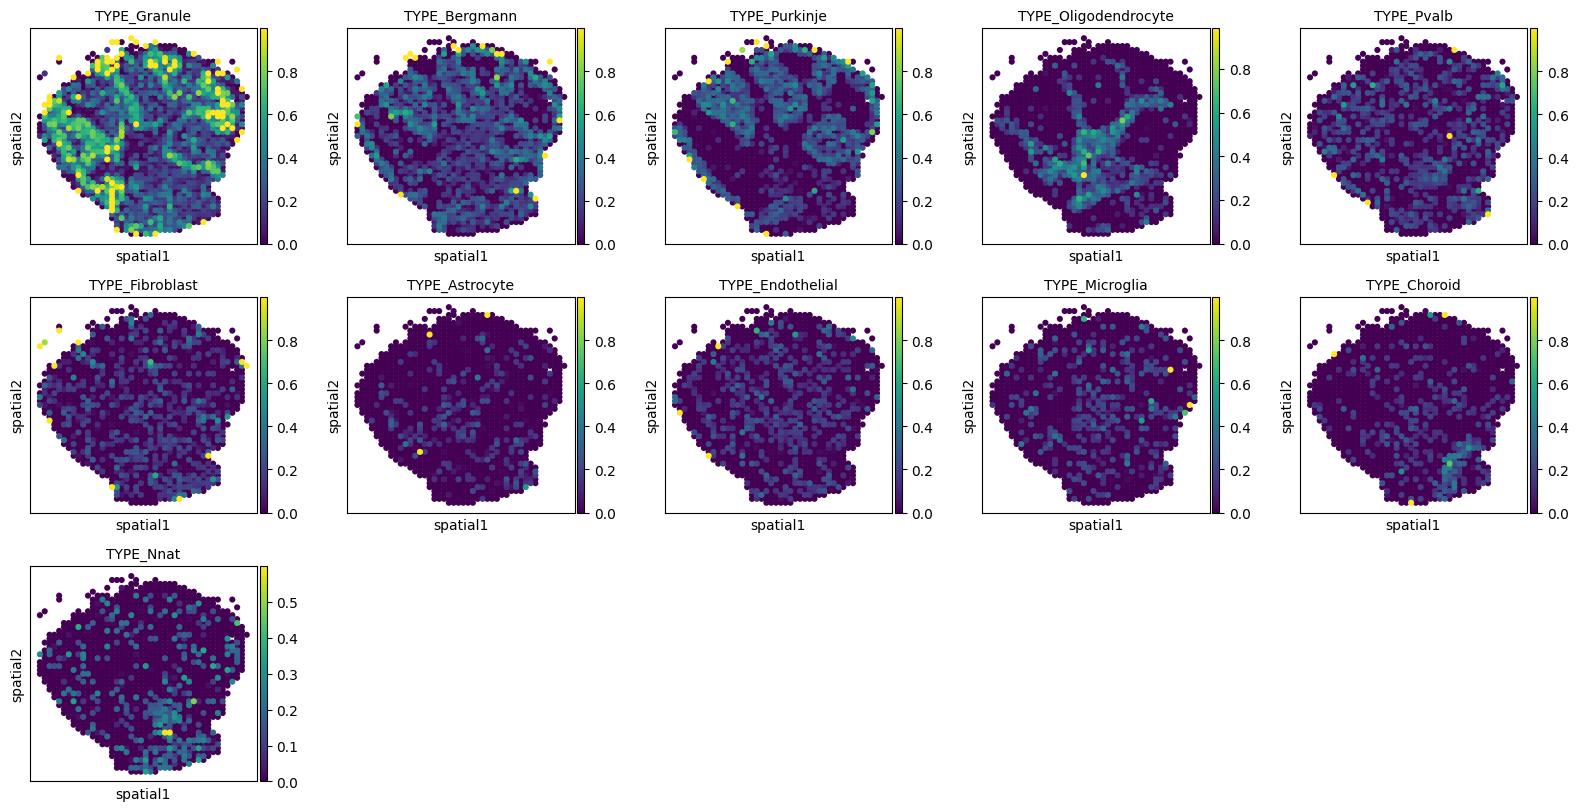

In [ ]:
sc.pl.embedding(st_ad,color=pre.columns[:20],basis='spatial',ncols=5)

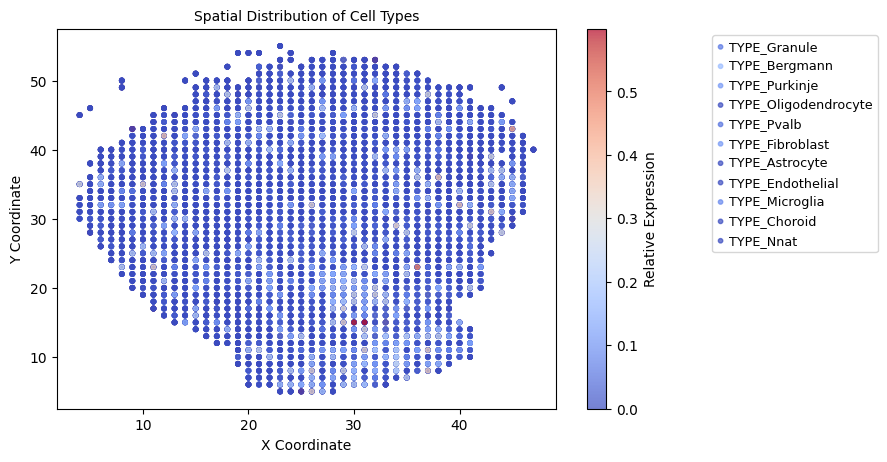

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 提取坐标信息
spatial_coords = st_ad.obsm['spatial']

# 设置画布大小
plt.figure(figsize=(8, 5))

# 遍历每个细胞类型
for cell_type in ['TYPE_Granule', 'TYPE_Bergmann', 'TYPE_Purkinje', 'TYPE_Oligodendrocyte', 'TYPE_Pvalb', 'TYPE_Fibroblast', 'TYPE_Astrocyte', 'TYPE_Endothelial', 'TYPE_Microglia', 'TYPE_Choroid', 'TYPE_Nnat']:
    # 获取细胞类型的相对表达量
    expression = st_ad.obs[cell_type]
    
    # 绘制每个细胞类型的表达量
    plt.scatter(spatial_coords[:, 0], spatial_coords[:, 1], c=expression, cmap='coolwarm', alpha=0.7, label=cell_type, s=10)

# 添加颜色条
plt.colorbar(label='Relative Expression')

# 添加标题和轴标签
plt.title('Spatial Distribution of Cell Types')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 设置Seaborn调色板
palette = sns.color_palette("husl", len(['TYPE_Astrocyte', 'TYPE_CA1', 'TYPE_CA2CA3', 'TYPE_Cajal Retzius', 
                  'TYPE_Choroid', 'TYPE_Dentate', 'TYPE_Endothelial', 'TYPE_Entorhinal', 
                  'TYPE_Ependyma', 'TYPE_Fibroblast', 'TYPE_Gad2', 'TYPE_Microglia', 
                  'TYPE_Mural', 'TYPE_Neurogenesis', 'TYPE_Oligodendrocyte', 'TYPE_Polydendrocyte', 
                  'TYPE_Sic17ab']))
sns.set_palette(palette)

# 将图例放在外面
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left')
# 去掉网格
plt.grid(False)
# 显示图形
plt.show()


In [ ]:
import pandas as pd

# 读取ground_truth.csv文件
ground_truth = pd.read_csv('/data/Celloc-main/data/Cerebellum/5/ground_truth.csv')

# 按'SpotID'和'CellType'分组，计算每个点中每种细胞类型的数量
grouped_data = ground_truth.groupby(['SpotID', 'CellType']).size().reset_index(name='Count')

# 透视表：每行对应一个点，每列代表细胞类型，每个条目表示该点中特定细胞类型的数量
ground_truth_pivot = grouped_data.pivot(index='SpotID', columns='CellType', values='Count')

# 计算比例，将缺失值填充为0
ground_truth_pivot = ground_truth_pivot.div(ground_truth_pivot.sum(axis=1), axis=0).fillna(0)

# 打印查看生成的DataFrame对象
print(ground_truth_pivot.head())

CellType  Astrocyte  Bergmann  Choroid  Endothelial  Fibroblast   Granule  \
SpotID                                                                      
S1              0.0  0.200000      0.0     0.000000    0.100000  0.400000   
S10             0.0  0.315789      0.0     0.052632    0.000000  0.210526   
S100            0.0  0.157895      0.0     0.000000    0.000000  0.631579   
S1000           0.0  0.153846      0.0     0.000000    0.076923  0.230769   
S1001           0.0  0.090909      0.0     0.000000    0.000000  0.090909   

CellType  Microglia  Nnat  Oligodendrocyte  Purkinje     Pvalb  
SpotID                                                          
S1         0.100000   0.0         0.000000  0.100000  0.100000  
S10        0.052632   0.0         0.000000  0.263158  0.105263  
S100       0.052632   0.0         0.000000  0.157895  0.000000  
S1000      0.000000   0.0         0.538462  0.000000  0.000000  
S1001      0.000000   0.0         0.818182  0.000000  0.000000  


In [ ]:
# 将 ground_truth_pivot 的 SpotID 格式与 st_ad 的 SpotID 格式匹配
ground_truth_pivot.index = 'SPOT_' + ground_truth_pivot.index
ground_truth_pivot



CellType,Astrocyte,Bergmann,Choroid,Endothelial,Fibroblast,Granule,Microglia,Nnat,Oligodendrocyte,Purkinje,Pvalb
SpotID,,,,,,,,,,,
SPOT_S1,0.000000,0.200000,0.000000,0.000000,0.100000,0.400000,0.100000,0.00,0.000000,0.100000,0.100000
SPOT_S10,0.000000,0.315789,0.000000,0.052632,0.000000,0.210526,0.052632,0.00,0.000000,0.263158,0.105263
SPOT_S100,0.000000,0.157895,0.000000,0.000000,0.000000,0.631579,0.052632,0.00,0.000000,0.157895,0.000000
SPOT_S1000,0.000000,0.153846,0.000000,0.000000,0.076923,0.230769,0.000000,0.00,0.538462,0.000000,0.000000
SPOT_S1001,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.00,0.818182,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
SPOT_S995,0.000000,0.052632,0.000000,0.000000,0.000000,0.421053,0.000000,0.00,0.000000,0.526316,0.000000
SPOT_S996,0.040000,0.120000,0.000000,0.000000,0.040000,0.520000,0.000000,0.04,0.040000,0.120000,0.080000
SPOT_S997,0.050000,0.050000,0.050000,0.000000,0.050000,0.600000,0.050000,0.00,0.000000,0.100000,0.050000


In [ ]:


# 提取 SpotID 中的数字部分
spot_numbers = ground_truth_pivot.index.str.extract(r'(\d+)').astype(int)

# 将 DataFrame 按照提取的数字部分进行排序
ground_truth_pivot = ground_truth_pivot.iloc[spot_numbers[0].argsort().values]

ground_truth_pivot

CellType,Astrocyte,Bergmann,Choroid,Endothelial,Fibroblast,Granule,Microglia,Nnat,Oligodendrocyte,Purkinje,Pvalb
SpotID,,,,,,,,,,,
SPOT_S1,0.00,0.200000,0.0,0.000000,0.100000,0.400000,0.1,0.0,0.0,0.100000,0.100000
SPOT_S2,0.00,0.000000,0.0,0.200000,0.000000,0.400000,0.0,0.0,0.0,0.400000,0.000000
SPOT_S3,0.00,0.000000,0.0,0.250000,0.250000,0.250000,0.0,0.0,0.0,0.250000,0.000000
SPOT_S4,0.25,0.750000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
SPOT_S5,0.00,0.500000,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
SPOT_S1540,0.00,0.272727,0.0,0.090909,0.000000,0.272727,0.0,0.0,0.0,0.272727,0.090909
SPOT_S1541,0.00,0.166667,0.0,0.000000,0.166667,0.500000,0.0,0.0,0.0,0.000000,0.166667
SPOT_S1542,0.00,0.000000,0.0,0.000000,0.333333,0.666667,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
# 将 ground_truth_pivot 添加到 st_ad.obs
st_ad.obs = st_ad.obs.merge(ground_truth_pivot, left_index=True, right_index=True, how='left')

In [ ]:
st_ad

AnnData object with n_obs × n_vars = 1544 × 1875
    obs: 'n_genes', 'batch', 'TYPE_Granule', 'TYPE_Bergmann', 'TYPE_Purkinje', 'TYPE_Oligodendrocyte', 'TYPE_Pvalb', 'TYPE_Fibroblast', 'TYPE_Astrocyte', 'TYPE_Endothelial', 'TYPE_Microglia', 'TYPE_Choroid', 'TYPE_Nnat', 'Astrocyte', 'Bergmann', 'Choroid', 'Endothelial', 'Fibroblast', 'Granule', 'Microglia', 'Nnat', 'Oligodendrocyte', 'Purkinje', 'Pvalb'
    var: 'n_cells'
    uns: 'log1p', 'celltypes'
    obsm: 'spatial'
    layers: 'norm'

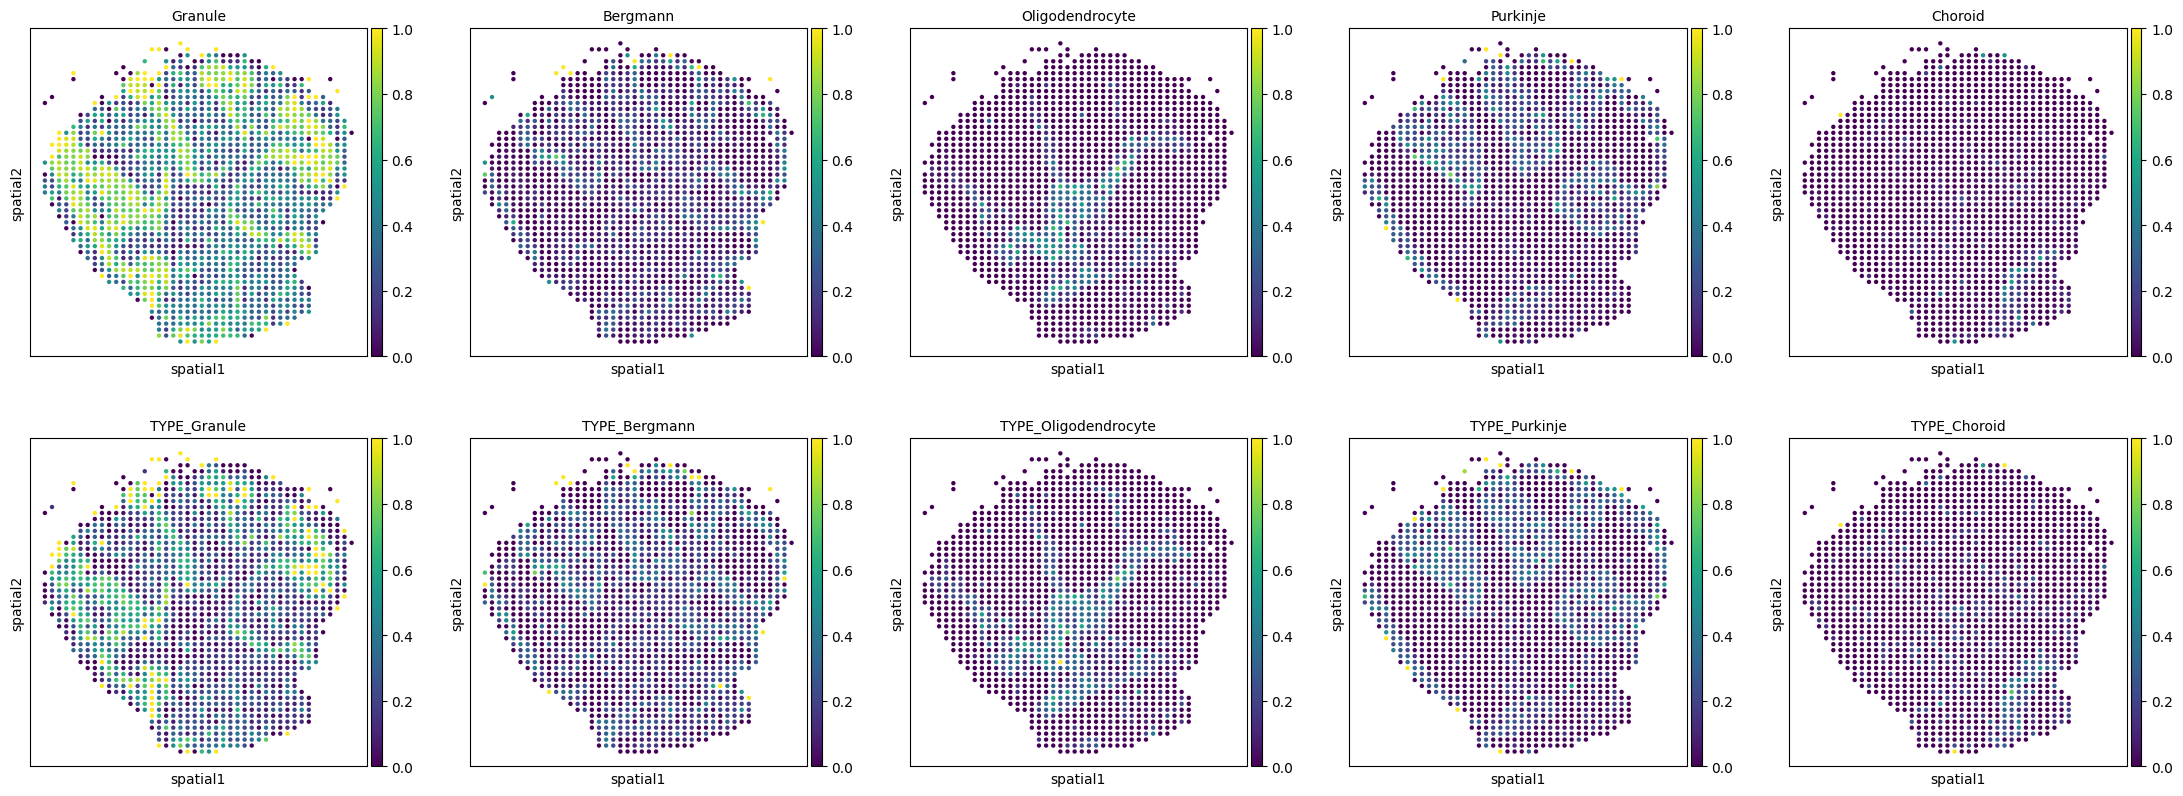

In [ ]:
import matplotlib.pyplot as plt
import scanpy as sc

# 设置图像和背景颜色
with plt.rc_context({'axes.facecolor': 'white', 'figure.figsize': [4.5, 4.5]}):
    # 运行scanpy的绘图函数，设置颜色范围在0-1之间
    sc.pl.embedding(
        st_ad, 
        color=['Granule', 'Bergmann', 'Oligodendrocyte', 'Purkinje', 'Choroid', 
               'TYPE_Granule', 'TYPE_Bergmann', 'TYPE_Oligodendrocyte', 'TYPE_Purkinje', 'TYPE_Choroid'], 
        basis='spatial', 
        ncols=5, 
        size=40, 
        vmin=0,  # 设置颜色最小值
        vmax=1   # 设置颜色最大值
    )

    plt.show()


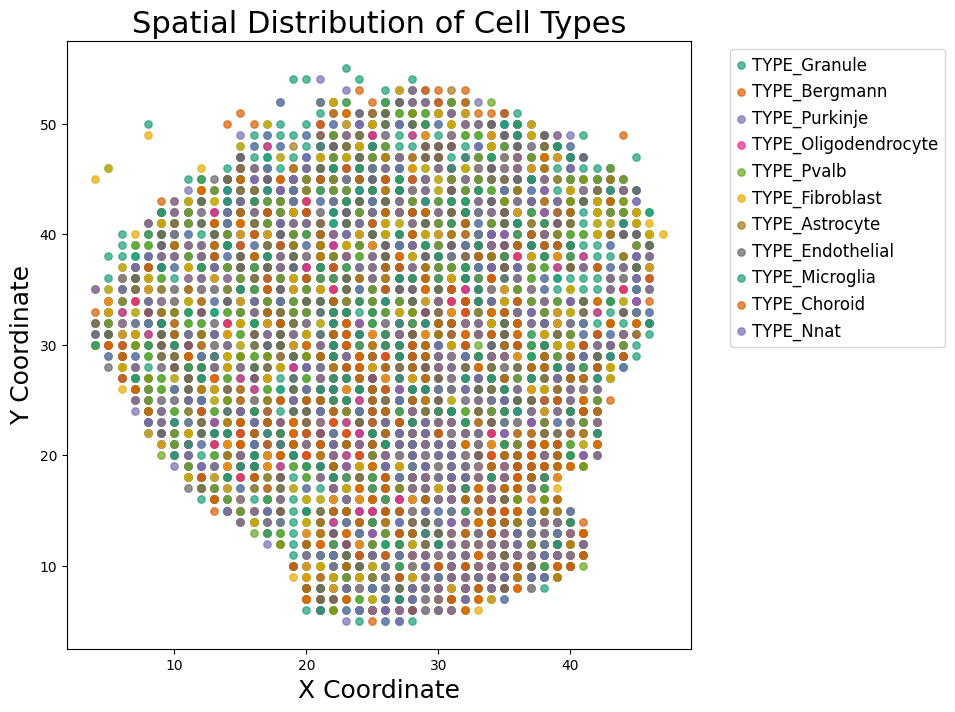

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 提取坐标信息
spatial_coords = st_ad.obsm['spatial']

# 设置画布大小
plt.figure(figsize=(8, 8))

# 细胞类型列表
cell_types = [
    'TYPE_Granule', 'TYPE_Bergmann', 'TYPE_Purkinje', 'TYPE_Oligodendrocyte', 'TYPE_Pvalb', 'TYPE_Fibroblast', 
    'TYPE_Astrocyte', 'TYPE_Endothelial', 'TYPE_Microglia', 'TYPE_Choroid', 'TYPE_Nnat'
]

# 设置更高对比度的颜色调色板
palette = sns.color_palette("Dark2", len(cell_types))
# 遍历每个细胞类型并绘制其空间分布
for i, cell_type in enumerate(cell_types):
    # 获取细胞类型的布尔值（是否为该类型的细胞）
    cell_mask = st_ad.obs[cell_type] > 0
    
    # 绘制每个细胞类型的点
    plt.scatter(spatial_coords[cell_mask, 0], spatial_coords[cell_mask, 1], 
                color=palette[i], label=cell_type, s=28, alpha=0.7)

# 添加标题和轴标签
plt.title('Spatial Distribution of Cell Types', fontsize=22)
plt.xlabel('X Coordinate', fontsize=18)
plt.ylabel('Y Coordinate', fontsize=18)

# 将图例放在外面
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# 去掉网格
plt.grid(False)

# 显示图形
plt.show()


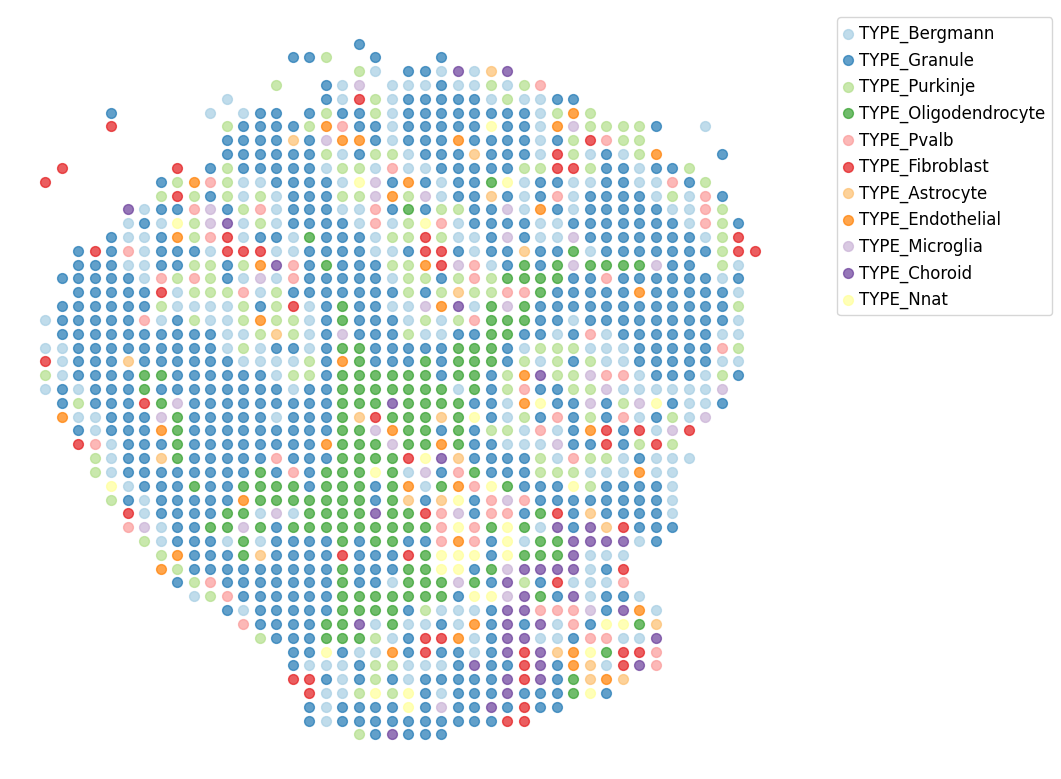

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 提取坐标信息
spatial_coords = st_ad.obsm['spatial']

# 细胞类型列表
cell_types = [
     'TYPE_Bergmann', 'TYPE_Granule','TYPE_Purkinje', 'TYPE_Oligodendrocyte', 'TYPE_Pvalb', 'TYPE_Fibroblast', 
    'TYPE_Astrocyte', 'TYPE_Endothelial', 'TYPE_Microglia', 'TYPE_Choroid', 'TYPE_Nnat',
]

# 提取每个细胞类型的表达量矩阵
expression_matrix = st_ad.obs[cell_types].values

# 找出每个点的最高表达量的细胞类型
max_expression_indices = np.argmax(expression_matrix, axis=1)

# 创建一个包含每个点的最高表达量细胞类型的列表
max_expression_cell_types = np.array(cell_types)[max_expression_indices]

# 设置更高对比度的颜色调色板
palette = sns.color_palette("Paired", len(cell_types))
color_dict = {cell_type: palette[i] for i, cell_type in enumerate(cell_types)}

# 设置画布大小
plt.figure(figsize=(10, 10))

# 遍历每个细胞类型并绘制其空间分布
for cell_type in cell_types:
    # 获取该细胞类型的点的掩码
    cell_mask = (max_expression_cell_types == cell_type)
    
    # 绘制每个细胞类型的点
    plt.scatter(spatial_coords[cell_mask, 0], spatial_coords[cell_mask, 1], 
                color=color_dict[cell_type], label=cell_type, s=50, alpha=0.7)

# 添加标题
# plt.title('Spatial Distribution of Dominant Cell Types', fontsize=22)

# 去掉图的边框和刻度
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 去掉 x 和 y 轴的刻度和刻度标签
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# 将图例放在外面
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# 去掉网格
plt.grid(False)

# 显示图形
plt.show()


In [ ]:
import pandas as pd

# 假设你要选择的列名为 'TYPE_Astrocyte', 'TYPE_Bergmann', 'TYPE_Choroid' 等
selected_columns = ['TYPE_Astrocyte', 'TYPE_Bergmann', 'TYPE_Choroid', 'TYPE_Endothelial', 'TYPE_Fibroblast', 'TYPE_Granule', 'TYPE_Microglia', 'TYPE_Nnat', 'TYPE_Oligodendrocyte', 'TYPE_Purkinje', 'TYPE_Pvalb']

# 从 adata.obs 中选择指定的列，并重命名列名
selected_data = st_ad.obs[selected_columns].rename(columns={
    'TYPE_Astrocyte': 'Astrocyte',
    'TYPE_Bergmann': 'Bergmann',
    'TYPE_Choroid': 'Choroid',
    'TYPE_Endothelial': 'Endothelial',
    'TYPE_Fibroblast': 'Fibroblast',
    'TYPE_Granule': 'Granule',
    'TYPE_Microglia': 'Microglia',
    'TYPE_Nnat': 'Nnat',
    'TYPE_Oligodendrocyte': 'Oligodendrocyte',
    'TYPE_Purkinje': 'Purkinje',
    'TYPE_Pvalb': 'Pvalb'
})

# 重置索引，以 "SpotID" 作为新的索引列
selected_data = selected_data.reset_index()
# 将 'index' 列重命名为 'CellType'
selected_data.rename(columns={'index': 'CellType'}, inplace=True)
# 将 'CellType' 列设置为索引
selected_data.set_index('CellType', inplace=True)
# 为新的索引列设置名称
selected_data.index.name = 'SpotID'

selected_data


,Astrocyte,Bergmann,Choroid,Endothelial,Fibroblast,Granule,Microglia,Nnat,Oligodendrocyte,Purkinje,Pvalb
SpotID,,,,,,,,,,,
SPOT_S1,0.0,0.291147,0.0,0.000000,0.187015,0.101707,0.141662,0.000000,0.0,0.184267,0.088123
SPOT_S2,0.0,0.000000,0.0,0.330276,0.000000,0.000000,0.000000,0.000000,0.0,0.660664,0.000000
SPOT_S3,0.0,0.000000,0.0,0.330447,0.402517,0.010105,0.000000,0.000000,0.0,0.255622,0.000000
SPOT_S4,0.0,0.999623,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
SPOT_S5,0.0,0.698936,0.0,0.000000,0.000000,0.000000,0.000000,0.293523,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
SPOT_S1540,0.0,0.339500,0.0,0.026913,0.000000,0.088922,0.000000,0.000000,0.0,0.302611,0.235581
SPOT_S1541,0.0,0.207407,0.0,0.000000,0.369139,0.228082,0.000000,0.000000,0.0,0.000000,0.194204
SPOT_S1542,0.0,0.000000,0.0,0.000000,0.990831,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
ground_truth_pivot

CellType,Astrocyte,Bergmann,Choroid,Endothelial,Fibroblast,Granule,Microglia,Nnat,Oligodendrocyte,Purkinje,Pvalb
SpotID,,,,,,,,,,,
SPOT_S1,0.00,0.200000,0.0,0.000000,0.100000,0.400000,0.1,0.0,0.0,0.100000,0.100000
SPOT_S2,0.00,0.000000,0.0,0.200000,0.000000,0.400000,0.0,0.0,0.0,0.400000,0.000000
SPOT_S3,0.00,0.000000,0.0,0.250000,0.250000,0.250000,0.0,0.0,0.0,0.250000,0.000000
SPOT_S4,0.25,0.750000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
SPOT_S5,0.00,0.500000,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
SPOT_S1540,0.00,0.272727,0.0,0.090909,0.000000,0.272727,0.0,0.0,0.0,0.272727,0.090909
SPOT_S1541,0.00,0.166667,0.0,0.000000,0.166667,0.500000,0.0,0.0,0.0,0.000000,0.166667
SPOT_S1542,0.00,0.000000,0.0,0.000000,0.333333,0.666667,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
# 将 ground_truth_pivot 添加到 st_ad.obs
st_ad.obs = st_ad.obs.merge(ground_truth_pivot, left_index=True, right_index=True, how='left')
selected_data.to_csv('/data/Celloc-main/data/Cerebellum/5/10/results/spacel.csv', index=False,float_format='%.6f')

In [ ]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import pandas as pd
import scanpy as sc
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import pearsonr,ttest_ind,mannwhitneyu
from sklearn.metrics import mean_squared_error
rcParams['pdf.fonttype'] = 42


In [ ]:
cell2loc_results=selected_data
gd_results=ground_truth_pivot

cell2loc_results = (cell2loc_results.T/cell2loc_results.sum(axis=1)).T
cell2loc_results = cell2loc_results.fillna(0)

gd_results = (gd_results.T/gd_results.sum(axis=1)).T
gd_results = gd_results.fillna(0)

gd_results = gd_results.loc[:,np.unique(gd_results.columns)]

In [ ]:
def ssim(im1,im2,M=1):
    im1, im2 = im1/im1.max(), im2/im2.max()
    mu1 = im1.mean()
    mu2 = im2.mean()
    sigma1 = np.sqrt(((im1 - mu1) ** 2).mean())
    sigma2 = np.sqrt(((im2 - mu2) ** 2).mean())
    sigma12 = ((im1 - mu1) * (im2 - mu2)).mean()
    k1, k2, L = 0.01, 0.03, M
    C1 = (k1*L) ** 2
    C2 = (k2*L) ** 2
    C3 = C2/2
    l12 = (2*mu1*mu2 + C1)/(mu1 ** 2 + mu2 ** 2 + C1)
    c12 = (2*sigma1*sigma2 + C2)/(sigma1 ** 2 + sigma2 ** 2 + C2)
    s12 = (sigma12 + C3)/(sigma1*sigma2 + C3)
    ssim = l12 * c12 * s12
    return ssim

def rmse(x1,x2):
    return mean_squared_error(x1,x2,squared=False)
def mae(x1,x2):
    return np.mean(np.abs(x1-x2))

from collections.abc import Iterable
def compare_results(gd,result_list,metric='pcc',columns=None,axis=1):
    if metric=='pcc':
        func = pearsonr
        r_ind = 0
    if metric=='mae':
        func = mae
        r_ind = None
    if metric=='jsd':
        func = jensenshannon
        r_ind = None
    if metric=='rmse':
        func = rmse
        r_ind = None
    if metric=='ssim':
        func = ssim
        r_ind = None
    if isinstance(result_list, pd.DataFrame):
        c_list = []
        if axis == 1:
            print('axis: ',1)
            for i,c in enumerate(gd.columns):
                r = func(gd.iloc[:,i].values, np.clip(result_list.iloc[:,i],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        else:
            print('axis: ',0)
            for i,c in enumerate(gd.index):
                r = func(gd.iloc[i,:].values, np.clip(result_list.iloc[i,:],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        df = pd.DataFrame(c_list,index=gd.columns,columns=columns)
    else:
        df_list = []
        for res in result_list:
            c_list = []
            if axis == 1:
                for i,c in enumerate(gd.columns):
                    r = func(gd.iloc[:,i].values, np.clip(res.iloc[:,i],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.columns)
            else:
                for i,c in enumerate(gd.index):
                    r = func(gd.iloc[i,:].values, np.clip(res.iloc[i,:],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.index)
            df_list.append(df_tmp)
        df = pd.concat(df_list,axis=1)
        df.columns = columns
    return df

In [ ]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import pandas as pd
import scanpy as sc
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import pearsonr,ttest_ind,mannwhitneyu
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [ ]:
#from scipy.stats import jensenshannon

from collections.abc import Iterable
def compare_results(gd,result_list,metric='pcc',columns=None,axis=1):
    if metric=='pcc':
        func = pearsonr
        r_ind = 0
    if metric=='mae':
        func = mae
        r_ind = None
    if metric=='jsd':
        func = jensenshannon
        r_ind = None
    if metric=='rmse':
        func = rmse
        r_ind = None
    if metric=='ssim':
        func = ssim
        r_ind = None
    if isinstance(result_list, pd.DataFrame):
        c_list = []
        if axis == 1:
            print('axis: ',1)
            for i,c in enumerate(gd.columns):
                r = func(gd.iloc[:,i].values, np.clip(result_list.iloc[:,i],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        else:
            print('axis: ',0)
            for i,c in enumerate(gd.index):
                r = func(gd.iloc[i,:].values, np.clip(result_list.iloc[i,:],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        df = pd.DataFrame(c_list,index=gd.columns,columns=columns)
    else:
        df_list = []
        for res in result_list:
            c_list = []
            if axis == 1:
                for i,c in enumerate(gd.columns):
                    r = func(gd.iloc[:,i].values, np.clip(res.iloc[:,i],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.columns)
            else:
                for i,c in enumerate(gd.index):
                    r = func(gd.iloc[i,:].values, np.clip(res.iloc[i,:],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.index)
            df_list.append(df_tmp)
        df = pd.concat(df_list,axis=1)
        df.columns = columns
    return df
starmap_spots_pcc = compare_results(
    gd_results,
    [cell2loc_results],
    columns = ['Cell2location'],
    axis=0,
    metric='pcc'
)
# starmap_clusters_pcc = compare_results(
#     gd_results,
#     [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
#     columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
#     axis=1,
#     metric='pcc'
# )
starmap_spots_ssim = compare_results(
    gd_results,
    [cell2loc_results],
    columns = ['Cell2location'],
    axis=0,
    metric='ssim'
)
# starmap_clusters_ssim = compare_results(
#     gd_results,
#     [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
#     columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
#     axis=1,
#     metric='ssim'
# )
starmap_spots_rmse = compare_results(
    gd_results,
    [cell2loc_results],
    columns = ['Cell2location'],
    axis=0,
    metric='rmse'
)
# starmap_clusters_rmse = compare_results(
#     gd_results,
#     [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
#     columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
#     axis=1,
#     metric='rmse'
# )
starmap_spots_jsd = compare_results(
    gd_results,
    [cell2loc_results],
    columns = ['Cell2location'],
    axis=0,
    metric='jsd'
)
# starmap_clusters_jsd = compare_results(
#     gd_results,
#     [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
#     columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
#     axis=1,
#     metric='jsd'
# )

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 starmap_spots_pcc 是你的数据集，其中的一列是 'values'
# 设定一个阈值，例如 10
threshold = 0

# 筛选数据，只保留 'values' 列中大于阈值的数据
filtered_data = starmap_spots_pcc[starmap_spots_pcc['Cell2location'] > threshold]



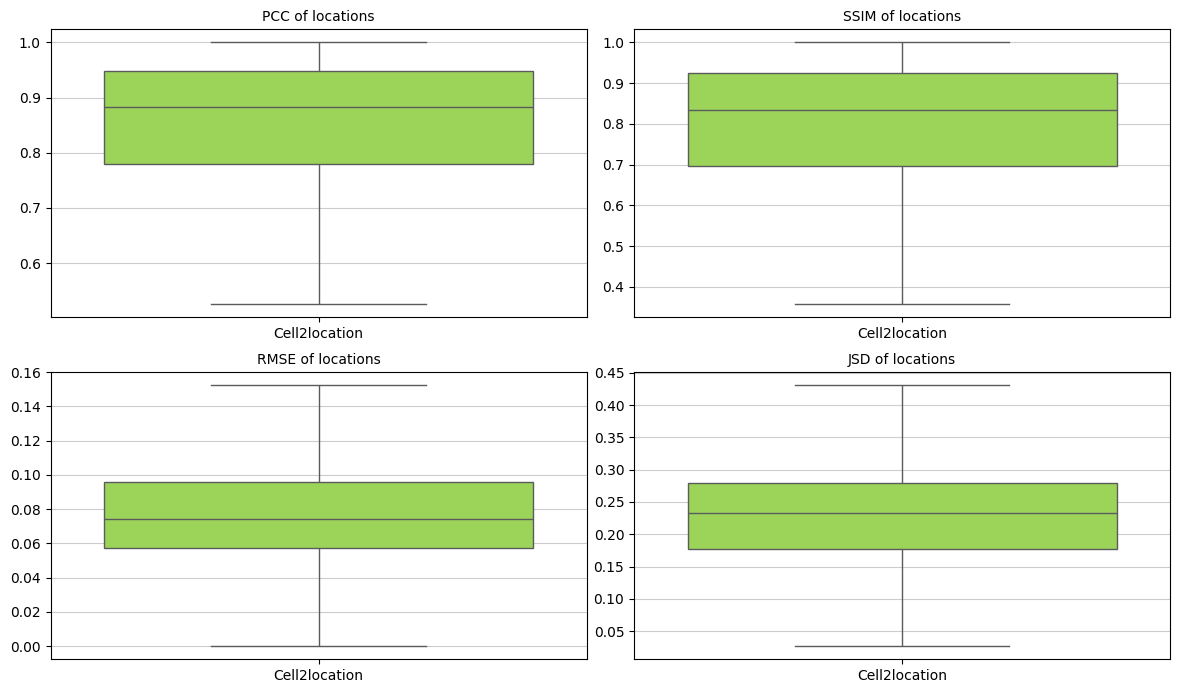

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming starmap_spots_pcc, starmap_spots_ssim, starmap_spots_rmse, starmap_spots_jsd are DataFrame objects

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 7))

order = ['Cell2location']
colors = ["#9de846"]

sns.boxplot(data=starmap_spots_pcc, order=order, palette=colors, ax=axes[0, 0], orient='v', showfliers=False, showmeans=False)
axes[0, 0].set_title('PCC of locations')

sns.boxplot(data=starmap_spots_ssim, order=order, palette=colors, ax=axes[0, 1], orient='v', showfliers=False, showmeans=False)
axes[0, 1].set_title('SSIM of locations')

sns.boxplot(data=starmap_spots_rmse, order=order, palette=colors, ax=axes[1, 0], orient='v', showfliers=False, showmeans=False)
axes[1, 0].set_title('RMSE of locations')

sns.boxplot(data=starmap_spots_jsd, order=order, palette=colors, ax=axes[1, 1], orient='v', showfliers=False, showmeans=False)
axes[1, 1].set_title('JSD of locations')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# sns.boxplot(data=starmap_clusters_pcc,order=order,palette=colors,ax=axes[1,0],orient='h', showfliers = False,showmeans=True)
# axes[1,0].set_title('PCC of clusters')
# sns.boxplot(data=starmap_clusters_ssim,order=order,palette=colors,ax=axes[1,1],orient='h', showfliers = False,showmeans=True)
# axes[1,1].set_title('SSIM of clusters')
# sns.boxplot(data=starmap_clusters_rmse,order=order,palette=colors,ax=axes[1,2],orient='h', showfliers = False,showmeans=True)
# axes[1,2].set_title('RMSE of clusters')
# sns.boxplot(data=starmap_clusters_jsd,order=order,palette=colors,ax=axes[1,3],orient='h', showfliers = False,showmeans=True)
# axes[1,3].set_title('JSD of clusters')
# plt.savefig(os.path.join('FigureData/Figure4/Dataset10_STARmap/Result_STARmap','starmap_all_metrics.pdf'),dpi=300,bbox_inches='tight')
#plt.show()
# plt.close()